# Lab 5 - Multivariate Regression, Non-Parametric Models and Cross-Validation

<mark>Goal</mark>: Our goal is to examine Regression with Multiple Variables Optimising a model for diabetes disease progression prediction using Polynomials, Decision Trees, and kNN. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Loading and Analysing Diabetese Data Set :

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

print(len(X))
print(len(y))

442
442


### Description of Diabetes dataset

In [3]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Number of Attributes: First 10 columns are numeric predictive values
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# Target value are stored in y
# Target: Column 11 is a quantitative measure of disease progression one year after baseline
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
combined_var = pd.concat([X,y] , axis=1)
combined_var.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1)

In [7]:
#this gives the information about the data types,columns, null value counts, memory usage
combined_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# Histogram SEX VS BMI

Text(0.5, 0.98, 'Distribution of BMI by Gender')

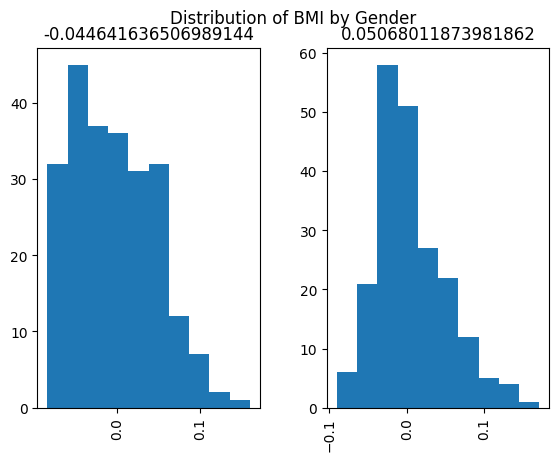

In [8]:
combined_var.hist(column="bmi" , by= "sex")
plt.suptitle("Distribution of BMI by Gender")

Looking at the two histogram we have ploted, they're separated by gender. However, it is not obvious which one is for males and which one is for females. So, we cannot just rely on our gut feeling. That means we cannot use the connection between BMI and gender for our analysis.

# Histogram BMI VS AGE

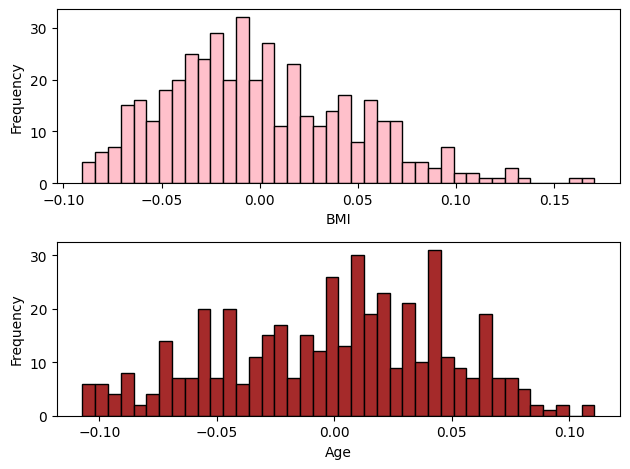

In [9]:

plt.subplot(2, 1, 1) 
plt.hist(combined_var["bmi"], bins=40, color='pink', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)  
plt.hist(combined_var["age"], bins=40, color='brown', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout() 

plt.show()

We notice that the scaled age values are evenly distributed between -0.5 and 0.5, indicating that they are centered around 0. This  result of scaling techniques like standardization, which helps us to create a more balanced and standardized representation of the age feature.

# Corelation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

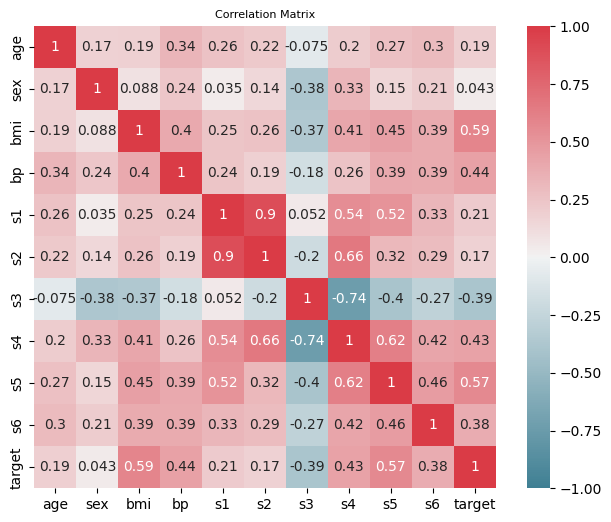

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
corr = combined_var.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax , annot=True)
plt.title('Correlation Matrix', fontsize=8)

Looking at our data, we notice that both S1 and S2 tend to go up together, indicating they are positively correlated. This suggests that having both might be unnecessary since they convey similar information. Additionally, when we look at S3 and S4, we see a strong relationship between them and their correlation value is close to -1. This means that as one of them increases, the other tends to decrease.

# Data Cleaning :

In [11]:

count = 0

for column_name, column_values in combined_var.items():
    if combined_var[column_name].isnull().any():
        count += 1
        print(f"Yes, there are null values in column {column_name}")

print(f"{count} Null Values present")

combined_var.isnull().sum()

0 Null Values present


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There are no null value in our data set so we do not require to filter or clean our data

# Spliting And Testing Data :

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=True)
X = X["bmi"]

X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

def create_polynomial_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, X_poly

# Creating Pipeline :

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

my_pipelines = [
    [
        ('linear_regression_degree_0', Pipeline([
            ('Poly', PolynomialFeatures(degree=0)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_1', Pipeline([
            ('Poly', PolynomialFeatures(degree=1)),
            ('regression', LinearRegression())         
        ])),
        ('linear_regression_degree_2', Pipeline([
            ('Poly', PolynomialFeatures(degree=2)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_3', Pipeline([
            ('Poly', PolynomialFeatures(degree=3)),
            ('regression', LinearRegression())            
        ])),

        ('linear_regression_degree_4', Pipeline([
            ('Poly', PolynomialFeatures(degree=4)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_5', Pipeline([
            ('Poly', PolynomialFeatures(degree=5)),
            ('regression', LinearRegression())

            
        ])),


        ('tree_depth_4', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=4 , criterion='absolute_error'))
        ])),
        ('tree_depth_4', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=5 , criterion='absolute_error'))
        ])),

        ('knn_neighbors_3', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=6))
        ])),
        ('knn_neighbors_4', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=7))
        ]))
    ]
]

for pipeline_group in my_pipelines:
    for name, pipe in pipeline_group:
        print(f"{name} Executed")

linear_regression_degree_0 Executed
linear_regression_degree_1 Executed
linear_regression_degree_2 Executed
linear_regression_degree_3 Executed
linear_regression_degree_4 Executed
linear_regression_degree_5 Executed
tree_depth_4 Executed
tree_depth_4 Executed
knn_neighbors_3 Executed
knn_neighbors_4 Executed


### <mark> Finding Values r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate

for cur_pipeline in my_pipelines:
        for name, pipeline in cur_pipeline:
            print(f"Pipeline: {name} ✔")
            pipeline.fit(X, y)
            linear_predictions = pipeline.predict(X)
            mean_pred = np.mean(linear_predictions)
            std_pred = np.std(linear_predictions)

            results = []
            scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

            
            cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

            results.append({
                'Model': name,
                'Mean': mean_pred,
                'STD': std_pred,
                'MAE': np.round(-cv_results['test_neg_mean_absolute_error'].mean(), 2),
                'Mean MAE': np.round(np.mean(-cv_results['test_neg_mean_absolute_error']),2),
                'STD MAE': np.round(np.std(-cv_results['test_neg_mean_absolute_error']),2),
                'R^2': np.round(cv_results['test_r2'].mean(), 2),
                'Mean R^2': np.round(np.mean(cv_results['test_r2']),2),
                'STD R^2': np.round(np.std(cv_results['test_r2']),2),
                'MAPE': np.round(-cv_results['test_neg_mean_absolute_percentage_error'].mean(), 2),
                'Mean MAPE': np.round(np.mean(-cv_results['test_neg_mean_absolute_percentage_error']),2),
                'STD MAPE': np.round(np.std(-cv_results['test_neg_mean_absolute_percentage_error']),2),
            })

            results_df = pd.DataFrame(results)
            print(results_df)
            print()

Pipeline: linear_regression_degree_0 ✔
                        Model        Mean  STD    MAE  Mean MAE  STD MAE   
0  linear_regression_degree_0  152.133484  0.0  65.89     65.89     5.26  \

    R^2  Mean R^2  STD R^2  MAPE  Mean MAPE  STD MAPE  
0 -0.04     -0.04     0.03  0.63       0.63      0.07  

Pipeline: linear_regression_degree_1 ✔
                        Model        Mean       STD    MAE  Mean MAE  STD MAE   
0  linear_regression_degree_1  152.133484  45.16003  52.29     52.29     1.93  \

   R^2  Mean R^2  STD R^2  MAPE  Mean MAPE  STD MAPE  
0  0.3       0.3      0.1  0.49       0.49      0.04  

Pipeline: linear_regression_degree_2 ✔
                        Model        Mean        STD    MAE  Mean MAE   
0  linear_regression_degree_2  152.133484  45.168382  52.57     52.57  \

   STD MAE  R^2  Mean R^2  STD R^2  MAPE  Mean MAPE  STD MAPE  
0     2.06  0.3       0.3     0.09  0.49       0.49      0.04  

Pipeline: linear_regression_degree_3 ✔
                        Mode

# Table :

| Pipeline |       | Mean | STD | MAE | Mean MAE | STD MAE | R^2 | Mean R^2 | STD R^2 | MAPE | Mean MAPE | STD MAPE |
|----------|-------|------|-----|-----|----------|---------|-----|----------|---------|------|-----------|----------|
| lin_reg_degree_0 | |152.13 | 0.0 | 65.89 | 65.89 | 5.26 | -0.04 | -0.04 | 0.03 | 0.63 | 0.63 | 0.07 |
| lin_regr_degree_1 | |152.13 | 45.16 | 52.29 | 52.29 | 1.93 | 0.3 | 0.3 | 0.1 | 0.49 | 0.49 | 0.04 |
| lin_regr_degree_2 | |152.13 | 45.16 | 52.57 | 52.57 | 2.06 | 0.3 | 0.3 | 0.09 | 0.49 | 0.49 | 0.04 |
| lin_regr_degree_3 | |152.13 | 45.23 | 52.71 | 52.71 | 2.1 | 0.3 | 0.3 | 0.09 | 0.49 | 0.49 | 0.04 |
| lin_regr_degree_4 | |152.13 | 45.26 | 52.76 | 52.76 | 2.36 | 0.3 | 0.3 | 0.09 | 0.49 | 0.49 | 0.05 |
| lin_regr_degree_5 | |152.13 | 45.51 | 52.89 | 52.89 | 2.87 | 0.29 | 0.29 | 0.07 | 0.49 | 0.49 | 0.05 |
| tree_depth_4 | |152.13 | 49.18 | 55.94 | 55.94 | 4.71 | 0.18 | 0.18 | 0.12 | 0.51 | 0.51 | 0.06 |
| tree_depth_4 | |152.13 | 50.80 | 57.37 | 57.37 | 4.59 | 0.15 | 0.15 | 0.12 | 0.51 | 0.51 | 0.06 |
| knn_neighbors_3 | |152.08 | 51.82 | 55.61 | 55.61 | 3.79 | 0.19 | 0.19 | 0.09 | 0.5 | 0.5 | 0.06 |
| knn_neighbors_4 | |152.52 | 51.09 | 54.65 | 54.65 | 3.86 | 0.21 | 0.21 | 0.09 | 0.49 | 0.49 | 0.05 |


# Best Model Selection

In [15]:
best_model = None
best_mean_r2 = float('-inf')
best_mean_mape = float('inf')
best_mean_mae = float('inf')
best_model_name = ""

for cur_pipeline in my_pipelines:
    for name, pipeline in cur_pipeline:
        pipeline.fit(X_train, y_train)
        linear_predictions = pipeline.predict(X_train)

        results = []
        scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

        # Perform cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

        mean_r2 = np.mean(cv_results['test_r2'])
        mean_mape = np.mean(-cv_results['test_neg_mean_absolute_percentage_error'])
        mean_mae = np.mean(-cv_results['test_neg_mean_absolute_error'])

        if mean_r2 > best_mean_r2 or (mean_r2 == best_mean_r2 and mean_mape < best_mean_mape) or (mean_r2 == best_mean_r2 and mean_mape == best_mean_mape and mean_mae < best_mean_mae):
            best_model = pipeline
            best_mean_r2 = mean_r2
            best_mean_mape = mean_mape
            best_mean_mae = mean_mae
            best_model_name = name

# Run the best model on the test set
best_model.fit(X_train, y_train)
test_predictions = best_model.predict(X_test)
test_r2 = best_model.score(X_test, y_test)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Best Model:{best_model_name}")
print(f"R-Squared on Test Set: {test_r2:.2f}")
print(f"MAPE on Test Set: {test_mape:.2f}")
print(f"MAE on Test Set: {test_mae:.2f}")


Best Model:linear_regression_degree_1
R-Squared on Test Set: 0.37
MAPE on Test Set: 0.43
MAE on Test Set: 51.15


# Plotting Best Model

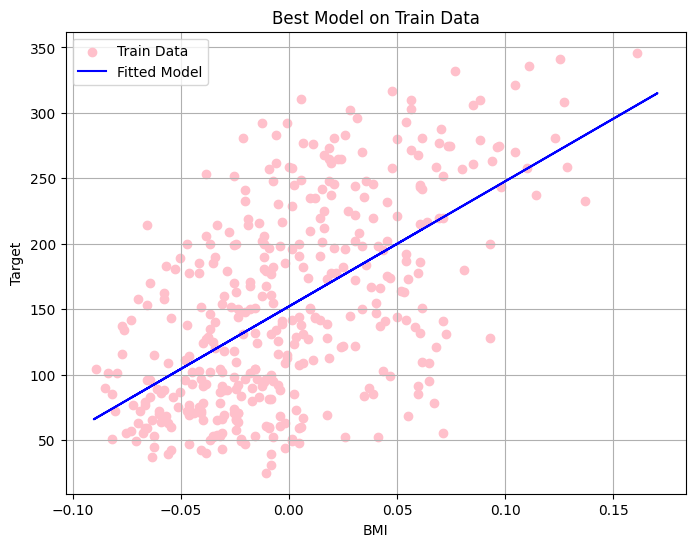

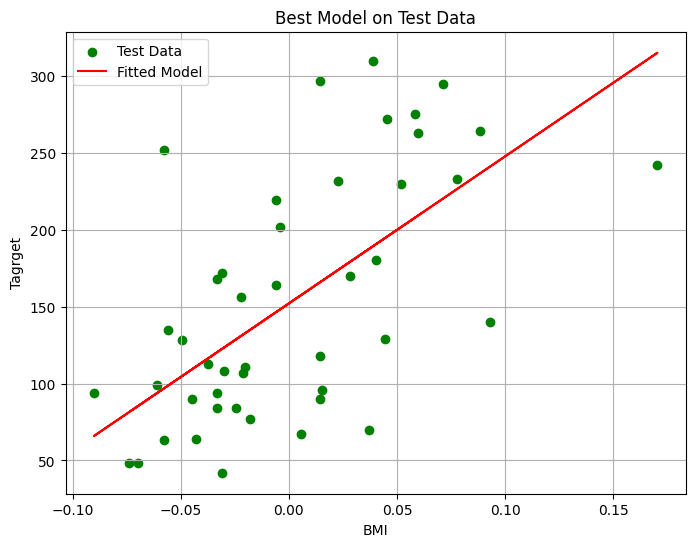

In [16]:
import matplotlib.pyplot as plt

all_predictions = best_model.predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='pink', label='Train Data')
plt.plot(X, all_predictions, color='blue', label='Fitted Model')
plt.title('Best Model on Train Data')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, all_predictions, color='red', label='Fitted Model')
plt.title('Best Model on Test Data')
plt.xlabel('BMI')
plt.ylabel('Tagrget')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

<mark>Summary of Performance:
* The chosen model "linear_regression_degree_1"  shows moderate predictive capability with an R-squared of 0.37, indicating that approximately 37% of the variance in the target variable is explained by the model.
* The MAPE of 0.43 suggests that, on average, the model's predictions deviate from the actual values by approximately 43%.
* The MAE of 51.15 indicates that, on average, the model's predictions have an absolute deviation of 51.15 units from the actual values.

<mark>Model Strengths:
* The model's R-squared value indicates that it captures a considerable portion of the variance in the target variable, suggesting a reasonable level of predictive power.
* The MAE and MAPE values are relatively low, indicating that the model's predictions are reasonably close to the actual values on average.

<mark>Areas of Improvement:
*  model still leaves a significant portion of the variance unexplained, as evidenced by the relatively low R-squared value.
* The MAPE of 0.43 suggests that the model's predictions have a relatively high percentage error, indicating that it may struggle with accurately predicting certain observations.
* The MAE of 51.15 indicates that the model's predictions can have substantial absolute errors, particularly for instances where precise predictions are crucial.

<mark>Model Limitations and Failure Points:
* Linearity Assumption: The linear regression model assumes a linear relationship between the independent and dependent variables. If the true relationship is nonlinear, the model may fail to capture complex patterns in the data, leading to lower predictive performance.

* Outliers and Influential Points: Outliers or influential data points that are not properly handled during model training can skew the model's predictions and its performance.

<mark>Conclusion:
* The "linear_regression_degree_1" model shows moderate predictive performance, capturing a considerable portion of the variance in the target variable while exhibiting relatively low MAE and MAPE values.
However, the model's performance leaves room for improvement, particularly in capturing complex nonlinear relationships and reducing prediction errors. while the "linear_regression_degree_1" model shows promise, addressing its limitations and failure points can lead to significant improvements in predictive accuracy and robustness.